# <a>Projeto 2 - Regressão Linear com Scikit Learn</a>

Projeto desenvolvido durante o curso Jornada Cientista de Dados do Let's Data

# <a>Motivação</a>

O Cientista de Dados deve resolver problemas de negócios, e uma grande parte desses problemas é a predição de uma variável numérica contínua (um número real). Quando temos esse tipo de problema podemos modelá-lo utilizando a Regressão.

A motivação do projeto é dar o primeiro passo no mundo do Machine Learning, com separação de bases, avaliação de métricas, cross validation e criação e comparação de modelos preditivos. Tudo isso utilizando a biblioteca Scikit Learn.

# <a>Objeto de Estudo</a>

Vamos trabalhar com informações de Planos de Saúde, já que a área médica e de planos de saúde utilizam muito as técnica de machine learning para avaliar risco dos seus segurados/pacientes. As bases de dados vieram do livro "Machine Learning with R" de Brett Lantz, e foi disponibilizada pela equipe do Let's Data.

O problema que iremos solucionar é: Prever os gastos com planos de saúde de acordo com as características do segurado. Os resultados são importantes tanto para as seguradoras, para prever quanto o cliente custará a elas, quanto para o segurado, que pode verificar quais características encarecem um plano de saúde.

In [1]:
# Importando as bibliotecas necessárias:

import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Configurando o pandas para mostras todas as linhas e colunas:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Configurando o pandas para não mostrar notação científica:

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Importando os dados:

df_seguro = pd.read_csv('C:\data_science\projeto-regressao\insurance.csv')
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [4]:
# Avaliando o tamanho da minha base:

df_seguro.shape

(1338, 7)

In [5]:
# Avaliando os tipos das features:

df_seguro.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Percebe-se que a nossa variável target (charges) é do tipo float, logo ela é contínua e trata-se de um problema modelado como regressão

In [6]:
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Percebe-se que não temos valores nulos em nenhuma das features, logo não será necessário o tratamento de dados faltantes (missing data)

# <a>Começando com Estatística Descritiva</a>

Antes de começar os modelos, precisamos conhecer as medidas estatísticas: MTC, Dispersão, Separatrizes e Distribuições. Tudo isso é essencial para compreendermos os nossos dados.

In [7]:
df_seguro.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


Começamos pelos valores numéricos: média, desvio padrão, valores máximo e mínimo e as separatrizes. Logo as variáveis categóricas não foram avaliadas.

<Axes: xlabel='age', ylabel='Count'>

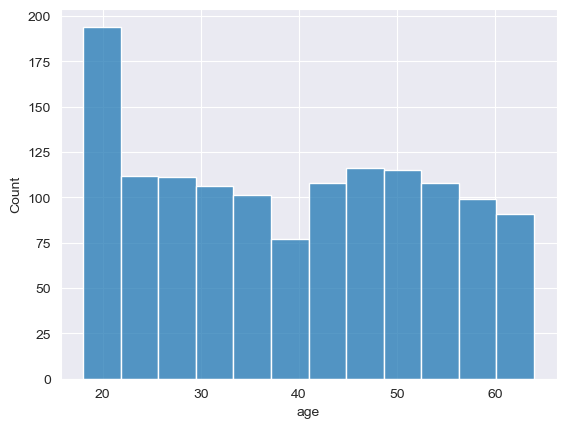

In [8]:
# Distribuição das Idades:

sns.set_style("darkgrid")
plt.tight_layout()
sns.histplot(data=df_seguro, x='age')

Existe um pico entre 19 e 22 anos, e depois segue um padrão quase uniforme, com um pequeno vale entre 38 e 40

<Axes: xlabel='bmi', ylabel='Count'>

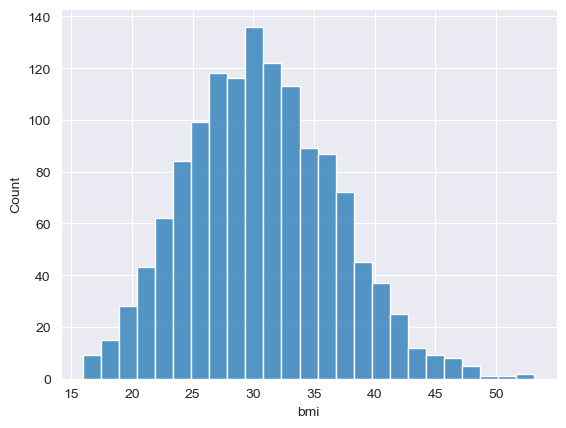

In [9]:
# Distribuição do BMI (Índice de Massa Corporal):

sns.set_style("darkgrid")
plt.tight_layout()
sns.histplot(data=df_seguro, x='bmi')

Percebe-se aqui uma distribuição bem parecida com uma distribuição normal, sem nenhuma cauda muito alongada nem para a esquerda e nem para a direita.

<Axes: xlabel='children', ylabel='count'>

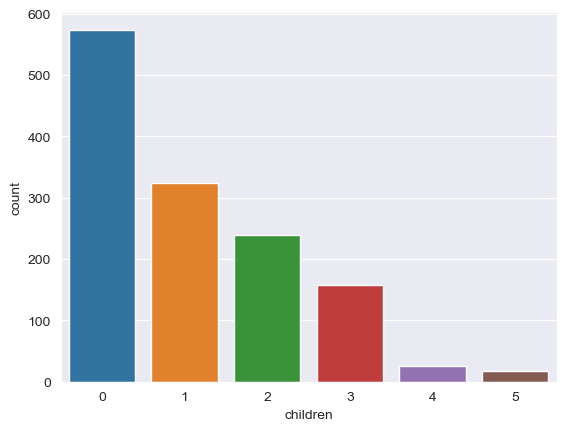

In [11]:
# Contagem do número de filhos:

sns.set_style("darkgrid")
plt.tight_layout()
sns.countplot(data=df_seguro, x='children')

A maioria dos segurados não possuem filhos, e esse número vai diminuindo até atingirmos o número máximo de filhos, que na base de dados foi de 5.

<Axes: xlabel='charges', ylabel='Count'>

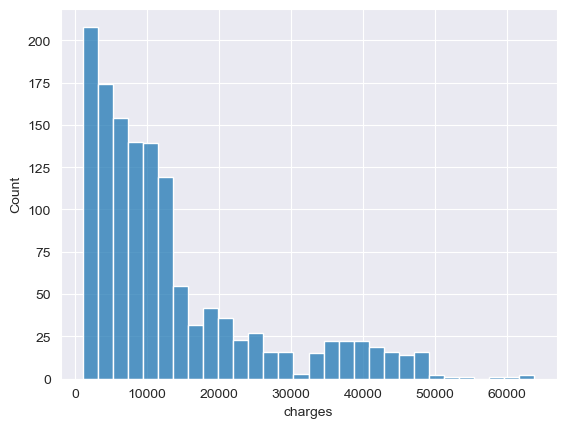

In [12]:
# Analisando por fim a variável target Valor do Seguro:

sns.histplot(data=df_seguro['charges'])

Percebe-se que temos muitos clientes pagando valores mais baixos, e poucos pagando valores mais altos. Ainda é cedo para dizer os motivos, mas talvez a idade e o número de filhos sejam fatores contribuintes. Pessoas jovens vão menos ao hospital, e pessoas sem filhos também.